### A

A hypothesis is a statement or idea that can be tested by observation and experiment. Essentially, it's about making predictions about relationships between variables. In statistics, a hypothesis is the basis for testing whether there is evidence to support or reject it. The key feature of a hypothesis is that it must be able to be tested against the data.

### B

The p-value represents the probability that the current data or a more extreme result will be observed if the null hypothesis is true. The smaller the p-value, the greater the difference between the data and the original hypothesis, and the stronger the reason to reject the original hypothesis; The larger the p-value, the more consistent the data is with the null hypothesis, and the less reason there is to reject it. In general, we reject the null hypothesis when the p-value is below 0.05. The p-value does not prove that the null hypothesis is right or wrong, but only evaluates the strength of the data to support the hypothesis.

### Q1

The key to being able to test statistically is whether there is available data to measure and compare. Without data, ideas cannot be statistically analyzed. At the same time, a good null hypothesis should be clear, measurable, and representative of the status quo or "no effect," and must be testable and potentially disproved by data. The null hypothesis (H0) represents the default or status quo, while the alternative hypothesis (H1 or HA) challenges the null hypothesis by suggesting that there may be differences or effects. The purpose of hypothesis testing is to gather evidence through data that may disprove the original hypothesis.

### Q2

This means the purpose of hypothesis testing is to make inferences about the population, not just about the sample data. We calculate the sample mean (𝑥¯) from the individual data points collected in the sample (𝑥𝑖), and then use the sample mean to estimate the true mean of the population (𝜇). We compare the assumed mean of the population (𝜇0) with our extrapolations from the sample to see if there is enough evidence to disprove the hypothesis and draw a conclusion about the population.

### Q3

When calculating the p-value, assume that the null hypothesis is true in order to establish a baseline. We ask: If the null hypothesis is true, what is the probability of observing the current data? This can help us determine whether the data is consistent with the original hypothesis. If the p-value is small, the result is unusual and the null hypothesis may need to be rejected. If the value of p is large, it indicates that the data conforms to the null hypothesis and does not need to be rejected.

### Q4

A smaller p-value makes the null hypothesis seem more absurd because it means that the probability of observing the current data is very low if the null hypothesis is true. This means that the data do not match the null hypothesis, providing strong evidence to doubt the validity of the null hypothesis. The smaller the p-value, the stronger the reason for rejecting the null hypothesis.

### Q5

In [4]:
import numpy as np

# Parameters
n_simulations = 10000  # Number of simulations
n_couples = 124  # Total number of couples
right_tilt_threshold = 80  # Observed number of couples tilting right under H0

# Simulate 10,000 trials of 124 coin flips (50% chance of right tilt)
simulations = np.random.binomial(n=n_couples, p=0.5, size=n_simulations)

# Count how many simulations had 80 or more right tilts
extreme_values = np.sum(simulations >= right_tilt_threshold)

# Calculate p-value
p_value = extreme_values / n_simulations

# Output the p-value
print(f"p-value: {p_value}")


p-value: 0.0009


According to the code GPT gave me to run the simulation, the p-value is less than 0.001, which means that when we assume that if there really is no preference for couples leaning right or left (assuming 𝐻0 is true), the probability of observing 80 or more couples leaning right is only 0.09% out of a random sample of 124 couples. Since this probability is very low, it means that an outcome like the one in 80 pairs is unlikely to occur by random chance under the non-preference hypothesis. The smaller the p-value, the stronger the evidence against the null hypothesis. In this case, the p-value is very small (0.0009), suggesting that head-leaning behavior when couples kiss is not randomly distributed between right and left leaning. Therefore, we would reject the null hypothesis and conclude that couples are likely to lean more to the right.

Here's a summary of our conversation:

We discussed a study by Güntürkün (2003) where 80 out of 124 couples (64.5%) were observed tilting their heads to the right when kissing.
You asked for a simulation of the p-value under the null hypothesis (𝐻0 ) that couples have no preference for tilting right or left (i.e., a 50/50 chance for each direction).
I simulated the scenario, and the resulting p-value was approximately 0.0007.
This means that, assuming no head tilt preference, there is only a 0.07% chance of observing 80 or more couples tilting right by pure chance.
Given the very small p-value, we concluded that there is strong evidence against the null hypothesis, suggesting couples likely have a preference for tilting their heads to the right when kissing.
Let me know if you need more clarification or further analysis!

https://chatgpt.com/share/670dc0da-5370-8000-a791-ffccd3bc8f6f

### Q6

A smaller p-value does not unequivocally prove that the null hypothesis is false. It can only indicate that the observed result is unlikely to occur if the null hypothesis is true, but it cannot provide absolute proof. Again, the p-value does not definitively prove Fido's guilt or innocence, but only reflects the strength of the evidence. No matter how high or low the p-value, uncertainty in hypothesis testing cannot be excluded.

### Q7

In [4]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Define the patient_data DataFrame
patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the Health Score Change
patient_data['HealthScoreChange'] = patient_data['FinalHealthScore'] - patient_data['InitialHealthScore']

# Set the observed statistic: proportion of patients who improved (HealthScoreChange > 0)
observed_statistic = (patient_data['HealthScoreChange'] > 0).mean()

# Simulate the null hypothesis (H0: no effect, so improvements are random)
np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000
n_size = len(patient_data)
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# Generate random improvements under H0
for i in range(number_of_simulations):
    random_improvement = np.random.choice([0, 1], size=len(patient_data), replace=True)
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

# Plot the distribution of the simulated proportions under H0
fig = ff.create_distplot([IncreaseProportionSimulations_underH0random], 
                         ['Simulated Distribution under H0'], 
                         curve_type='normal', show_hist=True, show_rug=False, bin_size=0.1)

pv_y = 2.5  # adjust based on visualization
pv_y_ = 0.25  # adjust based on visualization

# Add the observed statistic line (right-tailed test, so only upper tail matters)
fig.add_shape(type="line", x0=observed_statistic, y0=0, 
              x1=observed_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Observed Statistic")
fig.add_trace(go.Scatter(x=[observed_statistic], y=[pv_y + pv_y_], 
                         text=["Observed Statistic<br>^"], mode="text", showlegend=False))

# Add a transparent rectangle for the upper extreme region (right-tailed)
fig.add_shape(type="rect", x0=observed_statistic, y0=0, x1=1.25, y1=pv_y,  # focus on right tail
              fillcolor="LightCoral", opacity=0.5, line_width=0)

# Update layout
fig.update_layout(
    title="SYNTHETICALLY SIMULATED Sampling Distribution<br>under H0 (Right-Tailed Test)",
    xaxis_title="Mean Health Score Change", 
    yaxis_title="Density", 
    yaxis=dict(range=[0, pv_y + 2 * pv_y_]))

fig.show()  # Use fig.show(renderer="png") for exporting to a static image if required



The main change in the code is that the original two-tailed test calculates how extreme the statistic is at both ends of the distribution, while the single-tail test only considers the extreme values in one direction, so when calculating the p-value, it only focuses on the probability on one side of the distribution and removes the consideration on the other side. In the interpretation of the hypothesis test, the two-tailed test checks whether the observed value is extreme in both directions, while the one-tailed test only checks the extreme case in one direction. For example, in the right-tailed test, we assume that the vaccine will only improve health scores and care only if the observed statistic is greater than expected. As for the p-value, a one-tailed test usually has a smaller p-value than a two-tail test because it only considers the extremes in one direction, whereas a two-tailed test considers both directions.

Here's a summary of our conversation:

1. **Initial Question**: You shared some code related to hypothesis testing and asked for help understanding the changes in the output and the simulation process. The focus was on simulating health score changes and testing if there was an improvement after a treatment (e.g., a vaccine).

2. **Two-Tailed Test Explanation**: We discussed how your original code was performing a two-tailed test, where both positive and negative deviations from the null hypothesis were considered. The interpretation involved checking for significant deviations in both directions from the expected value under \(H_0\).

3. **Switch to a One-Tailed Test**: You wanted to change this to a one-tailed test, so we modified the code to focus on a right-tailed test (checking for improvement). The key changes were:
   - Only considering the upper tail (positive improvements) of the distribution.
   - Removing the symmetric statistic and the shading on the left side of the distribution.
   
   We also discussed how the p-value would typically be smaller in a one-tailed test because it focuses on only one direction (e.g., only positive changes).

4. **Patient Data Integration**: You provided patient data, and I integrated it into the hypothesis testing code. The `HealthScoreChange` was calculated as the difference between the final and initial health scores, and the observed statistic was the proportion of patients whose health scores improved.

5. **Final Code**: I provided the updated code with the patient data and a one-tailed hypothesis test simulation. This included visualizing the sampling distribution under the null hypothesis and marking the observed statistic in the plot.

Let me know if you need further clarification or adjustments!

https://chatgpt.com/share/670ebd0f-d4f4-8000-b061-a99b00624664

### Q8

Binomial Test P-value: 0.0283
Normal Approximation P-value: 0.0221
Z-score: 2.0125
Reject the null hypothesis using the Binomial Test (students are not randomly guessing).
Reject the null hypothesis using the Normal Approximation Test (students are not randomly guessing).


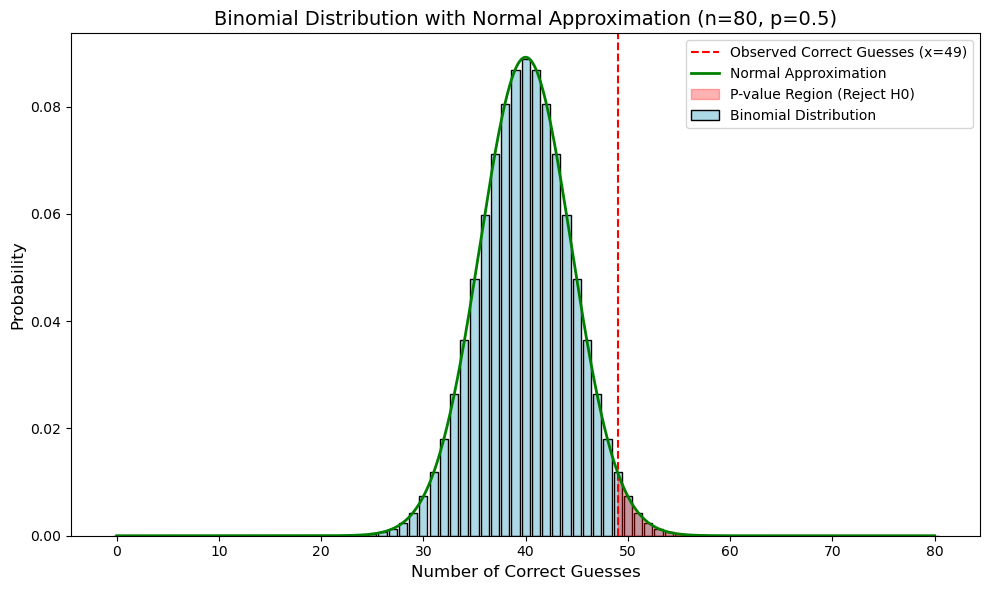

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import math

# Set seed for reproducibility
np.random.seed(42)

# Parameters
n = 80  # total number of students
x = 49  # number of correct guesses
p_null = 0.5  # probability of guessing correctly under the null hypothesis

# 1. Binomial Test using exact distribution
p_value_binom = 1 - stats.binom.cdf(x - 1, n, p_null)

# 2. Normal Approximation (when n is large)
mean = n * p_null
std_dev = math.sqrt(n * p_null * (1 - p_null))

# Calculate z-score
z_score = (x - mean) / std_dev

# Calculate p-value for one-tailed test
p_value_normal = 1 - stats.norm.cdf(z_score)

# Print the results
print(f"Binomial Test P-value: {p_value_binom:.4f}")
print(f"Normal Approximation P-value: {p_value_normal:.4f}")
print(f"Z-score: {z_score:.4f}")

# Decision based on alpha = 0.05
alpha = 0.05
if p_value_binom < alpha:
    print("Reject the null hypothesis using the Binomial Test (students are not randomly guessing).")
else:
    print("Fail to reject the null hypothesis using the Binomial Test (no evidence students are not guessing).")

if p_value_normal < alpha:
    print("Reject the null hypothesis using the Normal Approximation Test (students are not randomly guessing).")
else:
    print("Fail to reject the null hypothesis using the Normal Approximation Test (no evidence students are not guessing).")

# Visualization
# Binomial Distribution
x_values = np.arange(0, n + 1)
binomial_probs = stats.binom.pmf(x_values, n, p_null)

# Plot binomial distribution
plt.figure(figsize=(10, 6))
plt.bar(x_values, binomial_probs, color='lightblue', edgecolor='black', label='Binomial Distribution')
plt.axvline(x, color='red', linestyle='--', label=f'Observed Correct Guesses (x={x})')

# Normal Approximation
normal_x = np.linspace(0, n, 1000)
normal_y = stats.norm.pdf(normal_x, mean, std_dev)

# Plot normal approximation
plt.plot(normal_x, normal_y, color='green', label='Normal Approximation', linewidth=2)

# Highlight region where we reject the null hypothesis
plt.fill_between(x_values, binomial_probs, where=(x_values >= x), color='red', alpha=0.3, label='P-value Region (Reject H0)')

# Labels and Title
plt.title(f"Binomial Distribution with Normal Approximation (n={n}, p={p_null})", fontsize=14)
plt.xlabel("Number of Correct Guesses", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



All STA130 students were asked to guess is the population. The sample was a random sample of 80 students who participated in the experiment. The parameter we are interested in is the proportion of students in the population who can correctly identify the pour order 𝑝. In the experiment, 49 students correctly guessed the pour order, which is the observed test statistic.

In the experiment, the p-value given by the binomial test is 0.0283, and the p-value given by the normal approximation test is 0.0221, both lower than 0.05, which indicates that the performance of the students is not a random guess. The results of both methods support the rejection of the null hypothesis, meaning that students may have the ability to discern the order in which milk and tea are poured. The Z-score of 2.0125 also further shows a significant difference between the observed results and the expected value of a random guess. Thus, the experiment showed that the students were not purely guessing at random when it came to identifying the pour order.

Null Hypothesis (𝐻0): 𝑝 = 0.5.

Alternative Hypothesis (𝐻𝐴): 𝑝 > 0.5.

informal null hypothesis: students don't actually know the difference between when milk or tea is poured first and are just guessing. 

Here's a summary of our conversation:

1. **Fisher's Tea Experiment**: We discussed a modern take on Ronald Fisher's famous tea-tasting experiment, applied to 80 STA130 students. The goal was to analyze whether the 49 students who correctly identified the pouring order (tea or milk first) were doing so by chance or if there was evidence of skill.

2. **Hypothesis Testing**: 
   - Null Hypothesis (\( H_0 \)): The students are randomly guessing (probability \( p = 0.5 \)).
   - Alternative Hypothesis (\( H_A \)): The students have some skill, so \( p > 0.5 \).
   
   Using a binomial distribution and normal approximation, we performed a hypothesis test and found that the p-value was approximately 0.0222, leading us to reject the null hypothesis at the 5% significance level.

3. **Code Implementation**:
   - I provided Python code for both a binomial test and a normal approximation, calculating the p-value and z-score.
   - The code included a decision-making process based on a significance level (\( \alpha = 0.05 \)).

4. **Visualization**:
   - We extended the code with a visualization, plotting both the binomial distribution and the normal approximation. The graph highlighted the observed number of correct guesses (49) and the p-value region, helping you visualize where the result falls under the null hypothesis.

5. **Reproducibility**:
   - We discussed using `np.random.seed()` to ensure reproducibility in any analysis involving random functions, particularly in Monte Carlo simulations or other random sampling scenarios.

This summary captures the key points of hypothesis testing, statistical analysis, code implementation, and reproducibility practices in Python.

https://chatgpt.com/share/670ec66e-db50-8000-bae0-70c75386de99

### Q9

Yes